In [1]:
import kagglehub
ryanholbrook_dl_course_data_path = kagglehub.dataset_download('ryanholbrook/dl-course-data')

c:\Users\keep_\.conda\envs\depi-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%pip install tensorflow

  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp38-cp38-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-4.25.7-cp38-cp38-win_amd64.whl.metadata (

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-docx 1.1.2 requires typing-extensions>=4.9.0, but you have typing-extensions 4.5.0 which is incompatible.
torch 2.4.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.


In [ ]:
import pandas as pd

In [5]:
from os import listdir

print(listdir(ryanholbrook_dl_course_data_path))

['abalone.csv', 'candy.csv', 'cereal.csv', 'concrete.csv', 'diamonds.csv', 'forestfires.csv', 'fuel.csv', 'hotel.csv', 'housing.csv', 'ion.csv', 'red-wine.csv', 'songs.csv', 'spotify.csv']


In [48]:
hotel = pd.read_csv(f'{ryanholbrook_dl_course_data_path}/hotel.csv')

In [49]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [50]:
# Find the columns with null values and their count

for column in hotel.columns:
    if hotel[column].isnull().sum() > 0:
        print(f'{column}: {hotel[column].isnull().sum()} ({hotel[column].isnull().sum() / hotel.shape[0] * 100:.2f}%)')

children: 4 (0.00%)
country: 488 (0.41%)
agent: 16340 (13.69%)
company: 112593 (94.31%)


In [51]:
# unique textual values

for column in hotel.columns:
    if hotel[column].dtype == 'object':
        print(f'{column}: {hotel[column].nunique()}')

hotel: 2
arrival_date_month: 12
meal: 5
country: 177
market_segment: 8
distribution_channel: 5
reserved_room_type: 10
assigned_room_type: 12
deposit_type: 3
customer_type: 4
reservation_status: 3
reservation_status_date: 926


In [ ]:
# I will drop null values in children, country as they represent less than 1% of the data
# I will drop the agent, company columns
# I will drop the country column as it has too many unique values

hotel = hotel.dropna(subset=['children', 'agent'])
hotel = hotel.fillna({'agent': 'unknown'})
hotel = hotel.drop('country', axis=1)
hotel = hotel.drop(['agent', 'company'], axis=1)

In [53]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000
mean,0.390032,111.674336,2016.156510,27.339327,15.784198,0.977874,2.589337,1.899464,0.111142,0.007686,0.014023,0.077216,0.024862,0.201702,2.615665,104.619980,0.053218,0.605368
std,0.487759,107.671506,0.706216,13.285300,8.794013,1.003935,1.905763,0.491057,0.411817,0.097017,0.117584,0.757689,0.436639,0.624797,18.783661,50.034041,0.225719,0.799222
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.800000,0.000000,0.000000
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.300000,0.000000,0.000000
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,391.000000,5400.000000,3.000000,5.000000


In [54]:
# Unique string values count

for column in hotel.columns:
    if hotel[column].dtype == 'object':
        print(f'{column}: {hotel[column].nunique()}')

hotel: 2
arrival_date_month: 12
meal: 5
market_segment: 7
distribution_channel: 4
reserved_room_type: 8
assigned_room_type: 10
deposit_type: 3
customer_type: 4
reservation_status: 3
reservation_status_date: 923


In [55]:
# Encodings:

# one-hot encoding: hotel, meal, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, customer_type, reservation_status
# ordinal encoding: arrival_date_month, reservation_status_date
# Normalizations: adr, subtract min(arrival_date_year)

# Target: is_canceled

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
hotel[['arrival_date_month', 'reservation_status_date']] = encoder.fit_transform(hotel[['arrival_date_month', 'reservation_status_date']])

# one-hot encoding

hotel = pd.get_dummies(hotel, columns=['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'])


In [56]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(hotel, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

train.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
45197,0,45,2015,10.0,43,23,0,1,2,0.0,...,True,False,False,False,True,False,False,False,True,False
108434,0,70,2017,7.0,12,24,1,2,2,0.0,...,True,False,False,False,False,True,False,False,True,False
63123,1,56,2017,3.0,5,1,0,3,2,0.0,...,False,True,False,False,False,True,False,True,False,False
41832,1,50,2015,1.0,35,25,0,4,2,0.0,...,True,False,False,False,False,False,True,True,False,False
75273,1,299,2015,1.0,33,12,0,2,2,0.0,...,False,True,False,False,False,False,True,True,False,False


In [57]:
# calculate the normalization on the train set, apply it to the test and val sets

min_arrival_date_year = train['arrival_date_year'].min()
train['arrival_date_year'] = train['arrival_date_year'] - min_arrival_date_year
val['arrival_date_year'] = val['arrival_date_year'] - min_arrival_date_year
test['arrival_date_year'] = test['arrival_date_year'] - min_arrival_date_year

min_adr = train['adr'].min()
max_adr = train['adr'].max()

train['adr'] = (train['adr'] - min_adr) / (max_adr - min_adr)
val['adr'] = (val['adr'] - min_adr) / (max_adr - min_adr)
test['adr'] = (test['adr'] - min_adr) / (max_adr - min_adr)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

x_train = train.drop('is_canceled', axis=1)
y_train = train['is_canceled']

x_val = val.drop('is_canceled', axis=1)
y_val = val['is_canceled']

x_test = test.drop('is_canceled', axis=1)
y_test = test['is_canceled']

In [63]:
# Metrics to Use
    # Accuracy, Precision, Recall, F1-Score
    # Confusion Matrix
    # Visuals of training# /validation accuracy & loss

import tensorflow as tf

x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_val = tf.convert_to_tensor(x_val, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)


model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
2061/2061 [==============================] - 4s 2ms/step - loss: 0.1810 - accuracy: 0.9346 - val_loss: 0.0024 - val_accuracy: 0.9999
Epoch 2/10
2061/2061 [==============================] - 3s 1ms/step - loss: 0.0134 - accuracy: 0.9978 - val_loss: 0.0011 - val_accuracy: 0.9999
Epoch 3/10
2061/2061 [==============================] - 3s 2ms/step - loss: 9.1028e-04 - accuracy: 0.9999 - val_loss: 1.1441e-04 - val_accuracy: 1.0000
Epoch 4/10
2061/2061 [==============================] - 4s 2ms/step - loss: 8.1341e-05 - accuracy: 1.0000 - val_loss: 4.8550e-05 - val_accuracy: 1.0000
Epoch 5/10
2061/2061 [==============================] - 3s 2ms/step - loss: 3.2738e-05 - accuracy: 1.0000 - val_loss: 1.8060e-05 - val_accuracy: 1.0000
Epoch 6/10
2061/2061 [==============================] - 3s 2ms/step - loss: 1.1614e-05 - accuracy: 1.0000 - val_loss: 5.8393e-06 - val_accuracy: 1.0000
Epoch 7/10
2061/2061 [==============================] - 3s 2ms/step - loss: 3.6501e-06 - accuracy: 1.000

# Underfitting

In [67]:
model = keras.Sequential([
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=3, validation_data=(x_val, y_val))

Epoch 1/3
2061/2061 [==============================] - 3s 1ms/step - loss: 1.0365 - accuracy: 0.8502 - val_loss: 0.1551 - val_accuracy: 0.9920
Epoch 2/3
2061/2061 [==============================] - 2s 1ms/step - loss: 0.0974 - accuracy: 0.9975 - val_loss: 0.0559 - val_accuracy: 0.9998
Epoch 3/3
2061/2061 [==============================] - 2s 1ms/step - loss: 0.0371 - accuracy: 0.9998 - val_loss: 0.0234 - val_accuracy: 0.9999


## It's highly likely that this data is extremely correlated, leading to the simplest model performing well.

# Overfitting

Epoch 1/10
2061/2061 [==============================] - 5s 2ms/step - loss: 0.1896 - accuracy: 0.9141 - val_loss: 0.0228 - val_accuracy: 0.9932
Epoch 2/10
2061/2061 [==============================] - 4s 2ms/step - loss: 0.0551 - accuracy: 0.9855 - val_loss: 0.0012 - val_accuracy: 0.9999
Epoch 3/10
2061/2061 [==============================] - 4s 2ms/step - loss: 0.0178 - accuracy: 0.9959 - val_loss: 6.0811e-04 - val_accuracy: 0.9999
Epoch 4/10
2061/2061 [==============================] - 4s 2ms/step - loss: 0.0084 - accuracy: 0.9986 - val_loss: 1.3280e-05 - val_accuracy: 1.0000
Epoch 5/10
2061/2061 [==============================] - 4s 2ms/step - loss: 0.0064 - accuracy: 0.9983 - val_loss: 7.4841e-06 - val_accuracy: 1.0000
Epoch 6/10
2061/2061 [==============================] - 3s 2ms/step - loss: 9.6415e-07 - accuracy: 1.0000 - val_loss: 3.4770e-07 - val_accuracy: 1.0000
Epoch 7/10
2061/2061 [==============================] - 4s 2ms/step - loss: 1.6765e-07 - accuracy: 1.0000 - val_loss

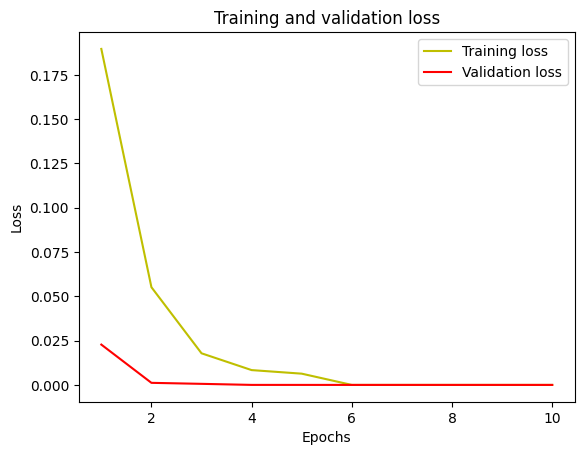

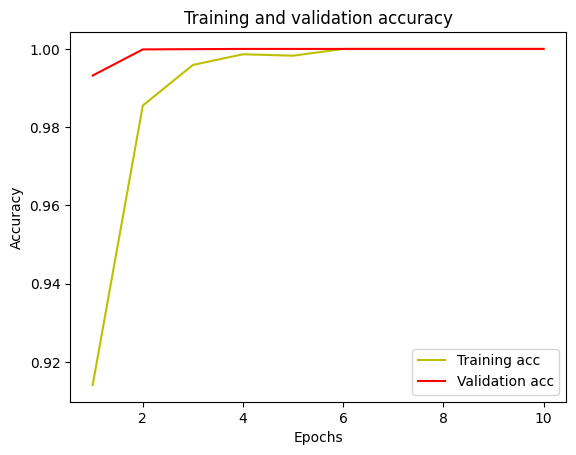

In [70]:
# Metrics to Use
    # Accuracy, Precision, Recall, F1-Score
    # Confusion Matrix
    # Visuals of training# /validation accuracy & loss

import tensorflow as tf

x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_val = tf.convert_to_tensor(x_val, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)


model = keras.Sequential([
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## While the accuracy doesn't decrease, it doesn't increase either, making it inefficient.

### Thus, me shall use early stopping to prevent overfitting.

Epoch 1/100
2061/2061 [==============================] - 6s 2ms/step - loss: 0.2057 - accuracy: 0.9113 - val_loss: 0.0644 - val_accuracy: 0.9912
Epoch 2/100
2061/2061 [==============================] - 5s 2ms/step - loss: 0.0061 - accuracy: 0.9984 - val_loss: 4.0197e-04 - val_accuracy: 0.9999
Epoch 3/100
2061/2061 [==============================] - 4s 2ms/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 3.8123e-06 - val_accuracy: 1.0000
Epoch 4/100
2061/2061 [==============================] - 4s 2ms/step - loss: 0.0183 - accuracy: 0.9948 - val_loss: 1.2562e-05 - val_accuracy: 1.0000
Epoch 5/100
2061/2061 [==============================] - 4s 2ms/step - loss: 0.0123 - accuracy: 0.9972 - val_loss: 2.5489e-06 - val_accuracy: 1.0000
Epoch 6/100
2061/2061 [==============================] - 4s 2ms/step - loss: 0.0064 - accuracy: 0.9990 - val_loss: 0.0016 - val_accuracy: 0.9999
Epoch 7/100
2061/2061 [==============================] - 4s 2ms/step - loss: 6.4040e-04 - accuracy: 0.9999 - val_l

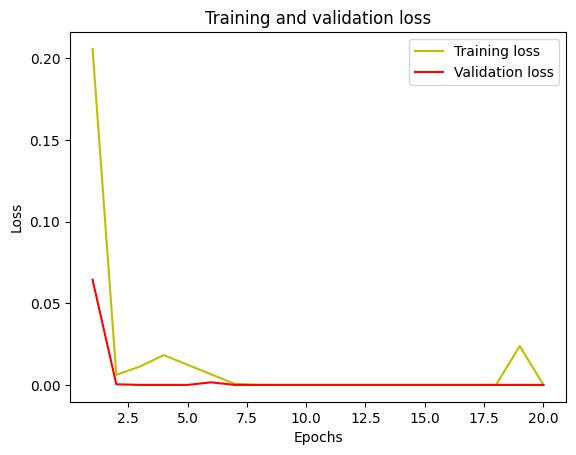

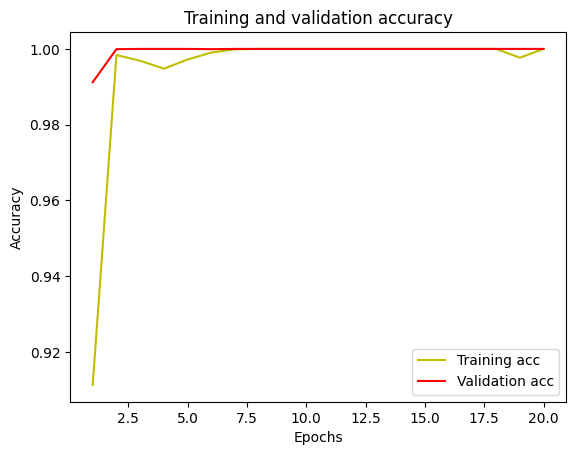

In [72]:
# Early Stopping

import tensorflow as tf

model = keras.Sequential([
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])

from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/100
2577/2577 [==============================] - 5s 1ms/step - loss: 0.1578 - accuracy: 0.9430
Epoch 2/100
2577/2577 [==============================] - 4s 1ms/step - loss: 4.9690e-04 - accuracy: 1.0000
Epoch 3/100
2577/2577 [==============================] - 4s 1ms/step - loss: 6.8870e-05 - accuracy: 1.0000
Epoch 4/100
2577/2577 [==============================] - 4s 1ms/step - loss: 0.0206 - accuracy: 0.9968
Epoch 5/100
2577/2577 [==============================] - 3s 1ms/step - loss: 6.8529e-05 - accuracy: 1.0000
Epoch 6/100
2577/2577 [==============================] - 3s 1ms/step - loss: 5.3320e-06 - accuracy: 1.0000
Epoch 7/100
2577/2577 [==============================] - 4s 2ms/step - loss: 8.2327e-07 - accuracy: 1.0000
Epoch 8/100
2577/2577 [==============================] - 4s 2ms/step - loss: 1.3560e-08 - accuracy: 1.0000
Epoch 9/100
2577/2577 [==============================] - 4s 1ms/step - loss: 3.7726e-09 - accuracy: 1.0000
Epoch 10/100
2577/2577 [=====================

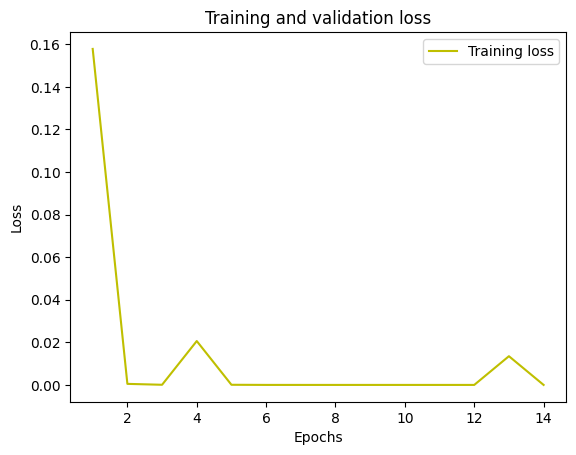

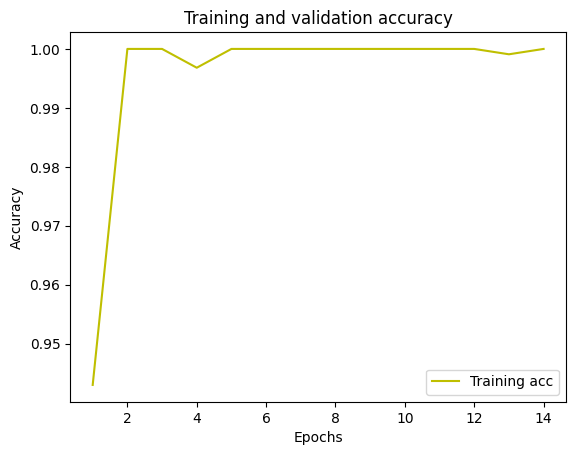

In [74]:
# Train with complete train-val set

import numpy as np

x_full = np.concatenate((x_train, x_val), axis=0)
y_full = np.concatenate((y_train, y_val), axis=0)

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_full, y_full, epochs=100, callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=2, restore_best_weights=True)])

from matplotlib import pyplot as plt

loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
# Evaluation

y_pred = model.predict(x_test)
y_pred = (y_pred >= 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

645/645 [==============================] - 1s 974us/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[12507     0]
 [    0  8103]]


# Perfection